 # WA- KING COUNTRY HOUSE PREDICTION PROJECT

## Project Architecture

- Goal
- Import Libraries and Load Data
- EDA( Expoloratory Data Analysis)
    - General Overview
    - Check it out columns(ALL)
        - General Check
        - Outlier Check
        - Clean Check
        - Null Data Check
        - Fill Data Check
        - Delete Data Check
        - Visualization Check
        - Editing Check
        - Fixing Error Check
    - Feature Engineering
    - Scaling & Normalization
    - PCA
- Modellig
    - Choose a Target & Show Correlation With Others
    - Train & Test
        - Don't Repeat Yourself Function
- Conclusion(Prediction)
    - R2_Square Score
    - Mean Absolute Error
    - Mean Square Error
- Model Evaluation
    - Feature Importance
    - Feature Engineering
    - R2_Square Score Rising
    - MAE Descent
    - Conclusion
        - PRESENTATION
    

## Goal

 I have data for homes in King County, Washington. I get almost all of that data. I have to guess what I don't get.

## Import Libraries and Load Data

In [1]:
# Importing pandas library for data analysis and manipulation
import pandas as pd

# Setting the maximum number of columns displayed in a DataFrame to 100
pd.set_option('display.max_column', 100)

# Importing seaborn library for data visualization
import seaborn as sns

# Importing warnings library to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv("kc_house_data.csv")

## EDA (Expoloratory Data Analysis)

### 1- General Overview

#### This script loads the data and shows different parts to help understand it.


In [3]:
# Displaying the number of rows and columns in the DataFrame
df.shape

(21613, 21)

In [4]:
# Displaying the first 5 rows (default) of the DataFrame
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Displaying the last 5 rows of the DataFrame
df.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
# Displaying a random sample of 5 rows from the DataFrame
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18491,2436700395,20141023T000000,621000.0,3,1.00,1340,4000,1.5,0,0,4,7,1340,0,1927,0,98105,47.6652,-122.288,1510,4000
8013,603001050,20140723T000000,230000.0,2,1.00,1430,4000,1.0,0,0,3,7,930,500,1949,0,98118,47.5233,-122.284,1110,4000
20482,3278612370,20140811T000000,349900.0,3,2.50,1580,2765,2.0,0,0,3,8,1580,0,2011,0,98126,47.5444,-122.369,1580,1820
12739,9264911210,20150226T000000,320000.0,5,3.00,2970,7000,1.0,0,0,3,8,1810,1160,1979,0,98023,47.3079,-122.341,2630,8062
18987,7896300150,20140929T000000,280000.0,3,1.75,1670,6034,1.0,0,0,3,7,990,680,1957,0,98118,47.5209,-122.286,1230,6034


In [7]:
# Showing information about the DataFrame, like column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
# Showing the number of missing values in each column
# 'isnull()' finds missing values, and 'sum()' adds them up
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# Showing the correlation matrix of numeric columns in the DataFrame
# This matrix shows how numeric columns are related to each other
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [10]:
# Showing summary statistics for numeric columns in the DataFrame
# This includes count, mean, standard deviation, min, and max values, etc.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
# Converting all column names to uppercase
df.columns = df.columns.str.upper()

In [12]:
df.head(1)

,ID,DATE,PRICE,BEDROOMS,BATHROOMS,SQFT_LIVING,SQFT_LOT,FLOORS,WATERFRONT,VIEW,CONDITION,GRADE,SQFT_ABOVE,SQFT_BASEMENT,YR_BUILT,YR_RENOVATED,ZIPCODE,LAT,LONG,SQFT_LIVING15,SQFT_LOT15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


### 2- Outlier

In [13]:
# Finding the 97th percentile (outlier threshold) for numeric columns in the DataFrame
outlier = df.quantile(q=.97, numeric_only=True)

In [14]:
# Displaying the 97th percentile values for numeric columns
outlier

ID               9.477100e+09
PRICE            1.388000e+06
BEDROOMS         5.000000e+00
BATHROOMS        3.500000e+00
SQFT_LIVING      4.140000e+03
SQFT_LOT         6.743684e+04
FLOORS           2.500000e+00
WATERFRONT       0.000000e+00
VIEW             3.000000e+00
CONDITION        5.000000e+00
GRADE            1.000000e+01
SQFT_ABOVE       3.700000e+03
SQFT_BASEMENT    1.340000e+03
YR_BUILT         2.013000e+03
YR_RENOVATED     1.989000e+03
ZIPCODE          9.818800e+04
LAT              4.776206e+01
LONG            -1.219040e+02
SQFT_LIVING15    3.560000e+03
SQFT_LOT15       5.140000e+04
Name: 0.97, dtype: float64

##### for example

In [15]:
# Calculating the positive and negative outlier thresholds for the 'BEDROOMS' column
# Positive threshold: column mean + (column standard deviation * 3)
# Negative threshold: column mean - (column standard deviation * 3)

positive_border_outlier = df['BEDROOMS'].mean() + 3 * df['BEDROOMS'].std()
negative_border_outlier = df['BEDROOMS'].mean() - 3 * df['BEDROOMS'].std()

In [16]:
positive_border_outlier

6.1610271165396

In [17]:
negative_border_outlier

0.58065612965482

### Check It Out Columns(ALL)

#### ID

In [18]:
df.head()

,ID,DATE,PRICE,BEDROOMS,BATHROOMS,SQFT_LIVING,SQFT_LOT,FLOORS,WATERFRONT,VIEW,CONDITION,GRADE,SQFT_ABOVE,SQFT_BASEMENT,YR_BUILT,YR_RENOVATED,ZIPCODE,LAT,LONG,SQFT_LIVING15,SQFT_LOT15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
# Displaying all unique values in the 'ID' column
df['ID'].unique()

array([7129300520, 6414100192, 5631500400, ..., 1523300141,  291310100,
       1523300157], dtype=int64)

In [20]:
# Showing the number of unique values in the 'ID' column
df['ID'].nunique()

21436

#### DATE

In [21]:
# Displaying the 'DATE' column from the DataFrame
df['DATE']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: DATE, Length: 21613, dtype: object

In [22]:
# Displaying all unique values in the 'DATE' column
df['DATE'].unique()

array(['20141013T000000', '20141209T000000', '20150225T000000',
       '20150218T000000', '20140512T000000', '20140627T000000',
       '20150115T000000', '20150415T000000', '20150312T000000',
       '20150403T000000', '20140527T000000', '20140528T000000',
       '20141007T000000', '20150124T000000', '20140731T000000',
       '20140529T000000', '20141205T000000', '20150424T000000',
       '20140514T000000', '20140826T000000', '20140703T000000',
       '20140516T000000', '20141120T000000', '20141103T000000',
       '20140626T000000', '20141201T000000', '20140624T000000',
       '20150302T000000', '20141110T000000', '20141203T000000',
       '20140613T000000', '20141230T000000', '20150213T000000',
       '20140620T000000', '20140715T000000', '20140811T000000',
       '20140707T000000', '20141028T000000', '20140729T000000',
       '20140718T000000', '20150325T000000', '20140716T000000',
       '20150428T000000', '20150311T000000', '20140916T000000',
       '20150217T000000', '20141231T0000

In [23]:
# Showing the number of unique values in the 'DATE' column
df['DATE'].nunique()

372

In [24]:
# Displaying information about the DataFrame, including data types
# Here, we note that the 'DATE' column is of object type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             21613 non-null  int64  
 1   DATE           21613 non-null  object 
 2   PRICE          21613 non-null  float64
 3   BEDROOMS       21613 non-null  int64  
 4   BATHROOMS      21613 non-null  float64
 5   SQFT_LIVING    21613 non-null  int64  
 6   SQFT_LOT       21613 non-null  int64  
 7   FLOORS         21613 non-null  float64
 8   WATERFRONT     21613 non-null  int64  
 9   VIEW           21613 non-null  int64  
 10  CONDITION      21613 non-null  int64  
 11  GRADE          21613 non-null  int64  
 12  SQFT_ABOVE     21613 non-null  int64  
 13  SQFT_BASEMENT  21613 non-null  int64  
 14  YR_BUILT       21613 non-null  int64  
 15  YR_RENOVATED   21613 non-null  int64  
 16  ZIPCODE        21613 non-null  int64  
 17  LAT            21613 non-null  float64
 18  LONG  

In [25]:
# Converting the 'DATE' column to datetime format and then formatting it as 'YYYYMMDD'
# This converts the 'T' in the original data to a date format of year, month, and day
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%dT%H%M%S').dt.strftime('%Y%m%d')

In [26]:
# Converting the 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             21613 non-null  int64         
 1   DATE           21613 non-null  datetime64[ns]
 2   PRICE          21613 non-null  float64       
 3   BEDROOMS       21613 non-null  int64         
 4   BATHROOMS      21613 non-null  float64       
 5   SQFT_LIVING    21613 non-null  int64         
 6   SQFT_LOT       21613 non-null  int64         
 7   FLOORS         21613 non-null  float64       
 8   WATERFRONT     21613 non-null  int64         
 9   VIEW           21613 non-null  int64         
 10  CONDITION      21613 non-null  int64         
 11  GRADE          21613 non-null  int64         
 12  SQFT_ABOVE     21613 non-null  int64         
 13  SQFT_BASEMENT  21613 non-null  int64         
 14  YR_BUILT       21613 non-null  int64         
 15  YR_RENOVATED   2161

##### This helps to prepare for feature engineering

In [28]:
# Displaying all unique values in the 'DATE' column
# This helps to check the results of feature engineering experiments
df['DATE'].unique()

<DatetimeArray>
['2014-10-13 00:00:00', '2014-12-09 00:00:00', '2015-02-25 00:00:00',
 '2015-02-18 00:00:00', '2014-05-12 00:00:00', '2014-06-27 00:00:00',
 '2015-01-15 00:00:00', '2015-04-15 00:00:00', '2015-03-12 00:00:00',
 '2015-04-03 00:00:00',
 ...
 '2015-03-08 00:00:00', '2014-08-30 00:00:00', '2015-05-27 00:00:00',
 '2015-03-22 00:00:00', '2015-02-15 00:00:00', '2014-10-11 00:00:00',
 '2015-02-01 00:00:00', '2014-11-30 00:00:00', '2014-08-24 00:00:00',
 '2014-07-27 00:00:00']
Length: 372, dtype: datetime64[ns]

In [29]:
# Extracting the year from the 'DATE' column and creating a new 'YEAR' column
df['YEAR'] = df['DATE'].dt.year

In [30]:
df.head(1)

,ID,DATE,PRICE,BEDROOMS,BATHROOMS,SQFT_LIVING,SQFT_LOT,FLOORS,WATERFRONT,VIEW,CONDITION,GRADE,SQFT_ABOVE,SQFT_BASEMENT,YR_BUILT,YR_RENOVATED,ZIPCODE,LAT,LONG,SQFT_LIVING15,SQFT_LOT15,YEAR
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014


In [31]:
# Extracting the month from the 'DATE' column and creating a new 'MONTH' column
df['MONTH'] = df['DATE'].dt.month

In [32]:
# Extracting the day from the 'DATE' column and creating a new 'DAY' column
df['DAY'] = df['DATE'].dt.day

In [33]:
df.head(1)

,ID,DATE,PRICE,BEDROOMS,BATHROOMS,SQFT_LIVING,SQFT_LOT,FLOORS,WATERFRONT,VIEW,CONDITION,GRADE,SQFT_ABOVE,SQFT_BASEMENT,YR_BUILT,YR_RENOVATED,ZIPCODE,LAT,LONG,SQFT_LIVING15,SQFT_LOT15,YEAR,MONTH,DAY
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13


In [34]:
# Extracting the month name from the 'DATE' column and creating a new 'MONTH_NAME' column
df['MONTH_NAME'] = df['DATE'].dt.month_name()

In [35]:
# Extracting the day of the week from the 'DATE' column and creating a new 'DAY_NAME' column
df['DAY_NAME'] = df['DATE'].dt.day_name()

In [36]:
df.head()

,ID,DATE,PRICE,BEDROOMS,BATHROOMS,SQFT_LIVING,SQFT_LOT,FLOORS,WATERFRONT,VIEW,CONDITION,GRADE,SQFT_ABOVE,SQFT_BASEMENT,YR_BUILT,YR_RENOVATED,ZIPCODE,LAT,LONG,SQFT_LIVING15,SQFT_LOT15,YEAR,MONTH,DAY,MONTH_NAME,DAY_NAME
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13,October,Monday
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,December,Tuesday
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25,February,Wednesday
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9,December,Tuesday
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18,February,Wednesday


### BEDROOMS

In [37]:
# Displaying the 'BEDROOMS' column from the DataFrame
df['BEDROOMS']

0        3
1        3
2        2
3        4
4        3
        ..
21608    3
21609    4
21610    2
21611    3
21612    2
Name: BEDROOMS, Length: 21613, dtype: int64

In [38]:
# Displaying all unique values in the 'BEDROOMS' column
df['BEDROOMS'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [39]:
# Showing the number of unique values in the 'BEDROOMS' column
df['BEDROOMS'].nunique()

13

<Axes: xlabel='BEDROOMS', ylabel='Density'>

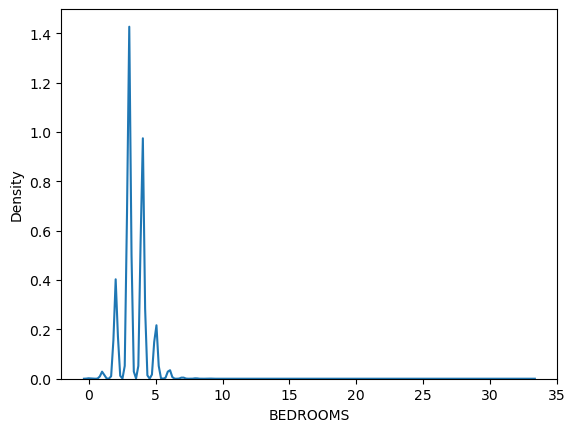

In [40]:
# Creating a Kernel Density Estimate (KDE) plot for the 'BEDROOMS' column
# This plot shows the distribution of the 'BEDROOMS' data
sns.kdeplot(x=df['BEDROOMS'])

<Axes: xlabel='BEDROOMS'>

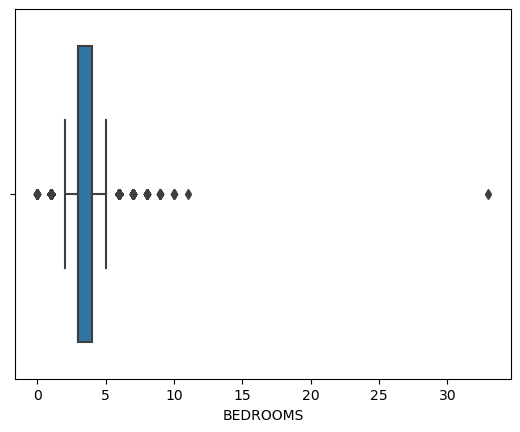

In [41]:
# Creating a box plot for the 'BEDROOMS' column
# This plot shows the distribution, median, and outliers of the 'BEDROOMS' data
sns.boxplot(x=df['BEDROOMS'])

#### Why We Remove Outliers?
We remove outliers to make our data closer to a normal distribution.

In [42]:
# Displaying the 97th percentile value (outlier threshold) for the 'BEDROOMS' column
outlier['BEDROOMS']

5.0

In [43]:
# Filtering the DataFrame to include only rows where 'BEDROOMS' is less than or equal to 6
df = df[df['BEDROOMS'] <= 6]

<Axes: xlabel='BEDROOMS', ylabel='Density'>

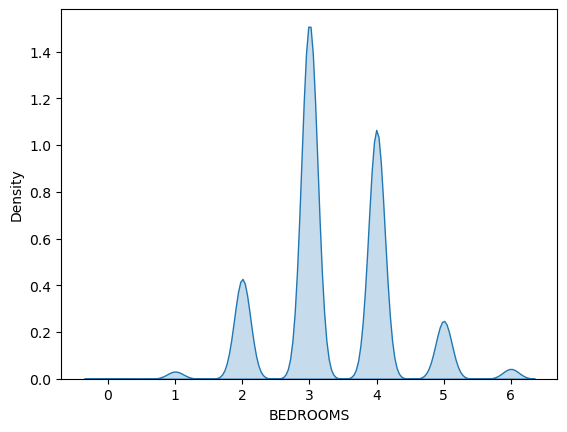

In [44]:
# Creating a Kernel Density Estimate (KDE) plot for the 'BEDROOMS' column with filled area
# This plot shows the distribution of 'BEDROOMS' data with the area under the curve filled
sns.kdeplot(x=df['BEDROOMS'], fill=True)

<Axes: xlabel='BEDROOMS'>

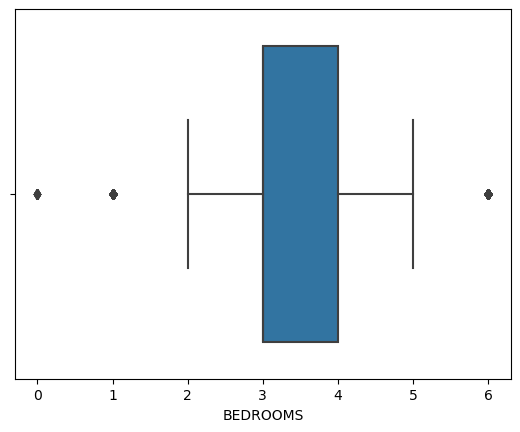

In [45]:
sns.boxplot(x=df['BEDROOMS'])

In [46]:
# Saving the DataFrame with the changes to a CSV file named 'final_version.csv'
# This helps to keep a record of the modifications made
df.to_csv('final_version.csv')

In [47]:
# Importing the files module from Google Colab
# Using the 'files.download()' function to download the 'final_version.csv' file
# This allows you to download the saved file to your local computer
#from google.colab import files
#files.download('final_version.csv')

##### Alternative Visualizations for Data Analysis


<Axes: xlabel='BEDROOMS'>

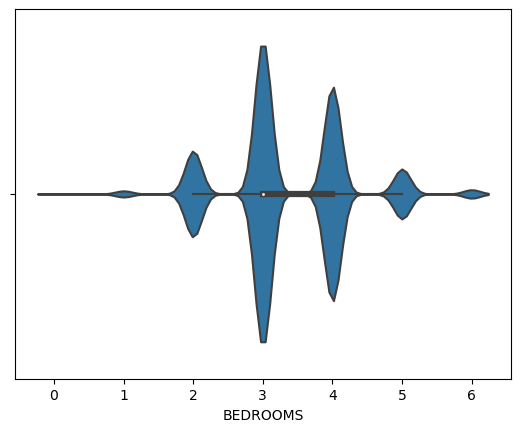

In [48]:
# Creating a violin plot for the 'BEDROOMS' column
# This plot shows the distribution and density of 'BEDROOMS' data
sns.violinplot(x=df['BEDROOMS'])

<Axes: xlabel='BEDROOMS', ylabel='Count'>

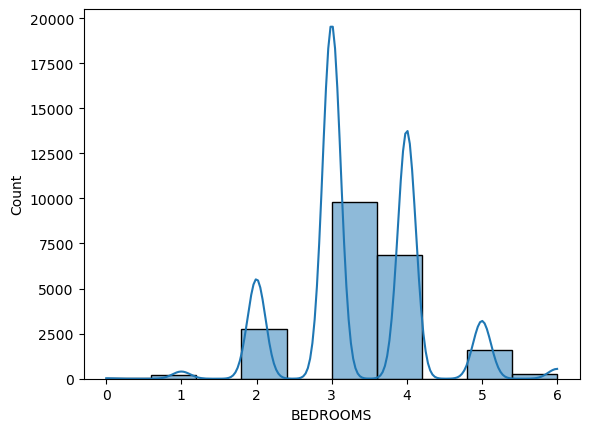

In [49]:
# Creating a histogram for the 'BEDROOMS' column
# This plot shows the frequency of different ranges of 'BEDROOMS'
sns.histplot(df['BEDROOMS'], bins=10, kde=True)

### BATHROOMS

First of all
##### Re-importing libraries and reloading data to avoid memory issues

In [50]:
# Importing pandas library for data analysis and manipulation
import pandas as pd

# Setting the maximum number of columns displayed in a DataFrame to 100
pd.set_option('display.max_column', 100)

# Importing seaborn library for data visualization
import seaborn as sns

# Importing warnings library to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Reloading the DataFrame from the CSV file
df = pd.read_csv('final_version.csv')

In [52]:
df.head()

,Unnamed: 0,ID,DATE,PRICE,BEDROOMS,BATHROOMS,SQFT_LIVING,SQFT_LOT,FLOORS,WATERFRONT,VIEW,CONDITION,GRADE,SQFT_ABOVE,SQFT_BASEMENT,YR_BUILT,YR_RENOVATED,ZIPCODE,LAT,LONG,SQFT_LIVING15,SQFT_LOT15,YEAR,MONTH,DAY,MONTH_NAME,DAY_NAME
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13,October,Monday
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,December,Tuesday
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25,February,Wednesday
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9,December,Tuesday
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18,February,Wednesday


In [53]:
# Displaying all unique values in the 'BATHROOMS' column
df['BATHROOMS'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 5.75, 8.  , 6.75, 7.75, 6.25, 6.5 ])

In [54]:
# Showing the number of unique values in the 'BATHROOMS' column
df['BATHROOMS'].nunique()

29

<Axes: xlabel='BATHROOMS', ylabel='Density'>

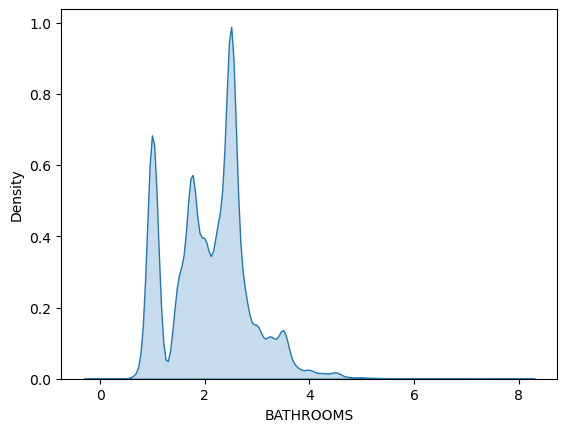

In [55]:
# Creating a Kernel Density Estimate (KDE) plot for the 'BATHROOMS' column with the area under the curve filled
# This plot shows the distribution of 'BATHROOMS' data
sns.kdeplot(x=df['BATHROOMS'], fill=True)

<Axes: xlabel='BATHROOMS'>

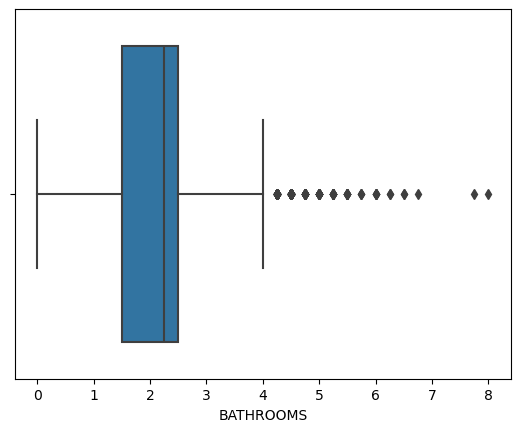

In [56]:
# Creating a box plot for the 'BATHROOMS' column
# This plot shows the distribution, median, and outliers of the 'BATHROOMS' data
sns.boxplot(x=df['BATHROOMS'])

In [57]:
# Displaying the 97th percentile value (outlier threshold) for the 'BATHROOMS' column
outlier['BATHROOMS']

3.5

In [58]:
# Calculating the positive and negative outlier thresholds for the 'BATHROOMS' column
# Positive threshold: column mean + (column standard deviation * 3)
# Negative threshold: column mean - (column standard deviation * 3)

positive_border_outlier2 = df['BATHROOMS'].mean() + 3 * df['BATHROOMS'].std()
negative_border_outlier2 = df['BATHROOMS'].mean() - 3 * df['BATHROOMS'].std()

# Displaying the positive and negative outlier thresholds
negative_border_outlier2

-0.18011465305355578

In [59]:
positive_border_outlier2

4.4007772673173955

In [60]:
# Filtering the DataFrame to include only rows where 'BATHROOMS' is less than or equal to 4
# This excludes any rows where 'BATHROOMS' is greater than 4
df = df[df['BATHROOMS'] <= 4]

<Axes: xlabel='BATHROOMS', ylabel='Density'>

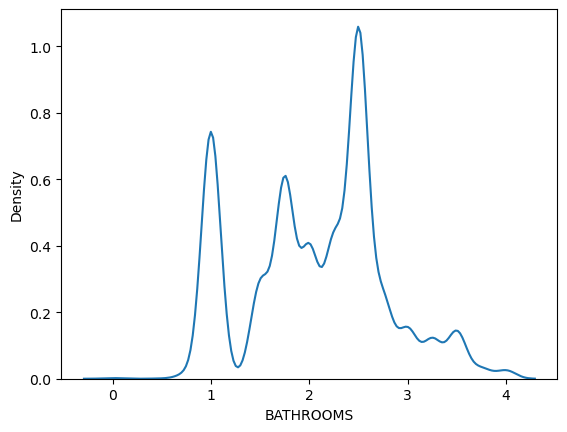

In [61]:
sns.kdeplot(x=df['BATHROOMS'])

<Axes: xlabel='BATHROOMS'>

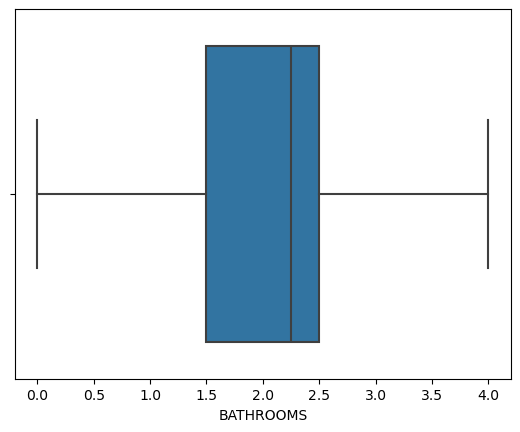

In [62]:
sns.boxplot(x=df['BATHROOMS'])

#### Total Entries Matching Filter Criteria

In [63]:
# Filtering the DataFrame to include only rows where 'BATHROOMS' equals 2
a = df[df['BATHROOMS'] == 2]

In [64]:
a

,Unnamed: 0,ID,DATE,PRICE,BEDROOMS,BATHROOMS,SQFT_LIVING,SQFT_LOT,FLOORS,WATERFRONT,VIEW,CONDITION,GRADE,SQFT_ABOVE,SQFT_BASEMENT,YR_BUILT,YR_RENOVATED,ZIPCODE,LAT,LONG,SQFT_LIVING15,SQFT_LOT15,YEAR,MONTH,DAY,MONTH_NAME,DAY_NAME
4,4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18,February,Wednesday
14,14,1175000570,2015-03-12,530000.0,5,2.0,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,2015,3,12,March,Thursday
16,16,1875500060,2014-07-31,395000.0,3,2.0,1890,14040,2.0,0,0,3,7,1890,0,1994,0,98019,47.7277,-121.962,1890,14018,2014,7,31,July,Thursday
25,25,1202000200,2014-11-03,233000.0,3,2.0,1710,4697,1.5,0,0,5,6,1710,0,1941,0,98002,47.3048,-122.218,1030,4705,2014,11,3,November,Monday
37,37,2768000400,2014-12-30,640000.0,4,2.0,2360,6000,2.0,0,0,4,8,2360,0,1904,0,98107,47.6702,-122.362,1730,4700,2014,12,30,December,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21469,21531,5637500082,2014-12-03,346000.0,3,2.0,1060,1184,2.0,0,0,3,7,730,330,2006,0,98136,47.5443,-122.385,1270,1601,2014,12,3,December,Wednesday
21485,21547,3277800823,2014-08-20,327000.0,2,2.0,1490,1627,2.0,0,0,3,8,1190,300,2009,0,98126,47.5455,-122.375,1400,1498,2014,8,20,August,Wednesday
21488,21550,880000205,2014-07-29,249000.0,3,2.0,1260,1125,2.0,0,0,3,7,810,450,2011,0,98106,47.5262,-122.361,1260,1172,2014,7,29,July,Tuesday
21494,21556,476000017,2014-10-03,553000.0,2,2.0,1400,1512,2.0,0,0,3,8,940,460,2006,0,98107,47.6719,-122.392,1400,3500,2014,10,3,October,Friday


In [65]:
# Displaying the number of rows in the DataFrame 'a'
a.shape[0]

1929

In [66]:
# So there are 1,929 entries where the number of bathrooms is 2.

### SQFT_LIVING

In [67]:
# Displaying all unique values in the 'SQFT_LIVING' column
df['SQFT_LIVING'].unique()

array([1180, 2570,  770, 1960, 1680, 1715, 1060, 1780, 1890, 3560, 1160,
       1430, 1370, 1810, 2950, 1600, 1200, 1250, 1620, 3050, 2270, 1070,
       2450, 1710, 1400, 1520, 2320, 1190, 2330, 1090, 2060, 2300, 1660,
       2360, 1220, 2620, 4220, 3595, 1570, 1280, 3160,  990, 2290, 2753,
       3150, 1410, 1980, 2730, 2830, 2250, 2420, 3250, 1850, 2150, 1260,
       2519, 1540, 2770, 2720, 2240, 1000, 3200, 4770, 2750, 2380, 1790,
       3430, 1760, 1040, 3450, 2350, 1900, 2020,  960, 2140, 2660, 1610,
       1030, 3520, 1580, 3300, 2070, 2190, 2920, 1210, 2340, 1670, 1240,
       3140, 2030, 2310, 2080, 3230, 4380, 1590,  880, 2400, 1450, 2100,
       2910, 2160, 2010, 3950, 1320, 2590, 1170, 1110, 2820, 3670, 2550,
       2260, 1360, 5180,  700, 3960, 2640, 1270, 3400, 1910, 1340, 2680,
       1560, 3880, 1120, 1970, 1950, 1350, 2440, 1050, 3130, 4090, 1490,
       1330, 2230, 1650, 2180, 1690,  860, 1940, 1010, 1300,  910, 2480,
        900, 1550, 2714, 1720,  850, 3900, 2760, 17

In [68]:
# Showing the number of unique values in the 'SQFT_LIVING' column
df['SQFT_LIVING'].nunique()

959

<Axes: xlabel='SQFT_LIVING', ylabel='Density'>

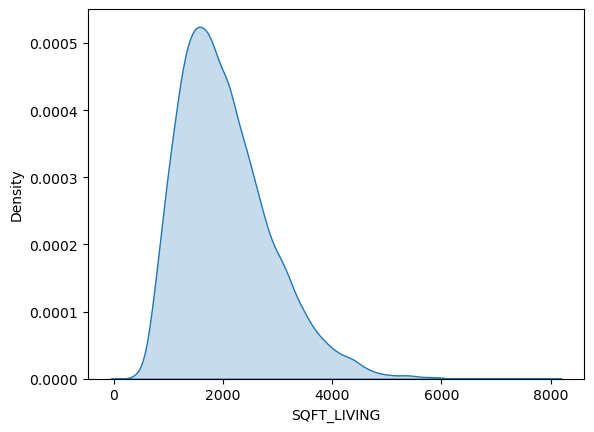

In [69]:
sns.kdeplot(x=df['SQFT_LIVING'],fill=True)

<Axes: xlabel='SQFT_LIVING'>

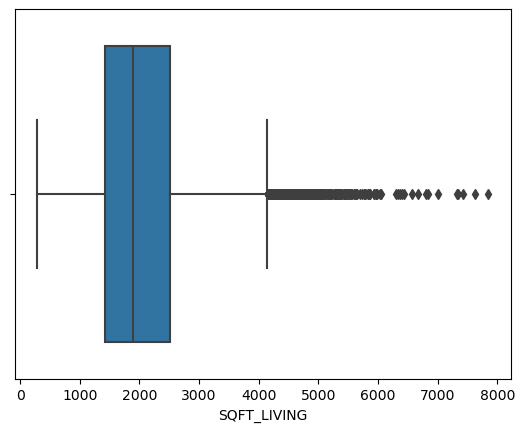

In [70]:
sns.boxplot(x=df['SQFT_LIVING'])

In [71]:
outlier['SQFT_LIVING']

4140.0

In [72]:
# Filtering the DataFrame to include only rows where 'SQFT_LIVING' is less than or equal to 4140
# This excludes any rows where 'SQFT_LIVING' is greater than 4140
df = df[df['SQFT_LIVING'] <= 4140]

<Axes: xlabel='SQFT_LIVING', ylabel='Density'>

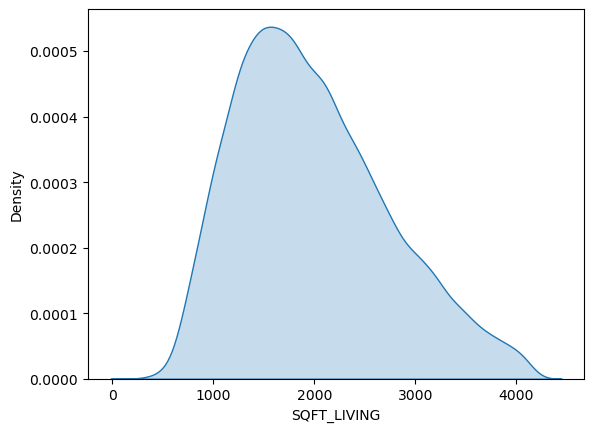

In [73]:
sns.kdeplot(x=df['SQFT_LIVING'], fill=True)

<Axes: xlabel='SQFT_LIVING'>

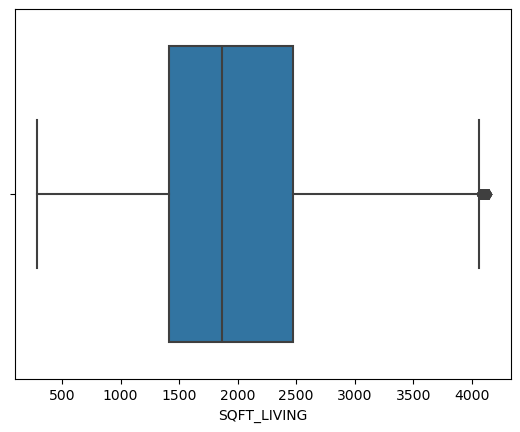

In [74]:
sns.boxplot(x=df['SQFT_LIVING'])

## We will repeat this process for all columns to filter outliers.



### SQFT_LOT

In [75]:
df.head(3)

,Unnamed: 0,ID,DATE,PRICE,BEDROOMS,BATHROOMS,SQFT_LIVING,SQFT_LOT,FLOORS,WATERFRONT,VIEW,CONDITION,GRADE,SQFT_ABOVE,SQFT_BASEMENT,YR_BUILT,YR_RENOVATED,ZIPCODE,LAT,LONG,SQFT_LIVING15,SQFT_LOT15,YEAR,MONTH,DAY,MONTH_NAME,DAY_NAME
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13,October,Monday
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,December,Tuesday
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25,February,Wednesday


In [76]:
# Displaying all unique values in the 'SQFT_LOT' column
df['SQFT_LOT'].unique()

array([ 5650,  7242, 10000, ...,  5813,  2388,  1076], dtype=int64)

In [77]:
# Showing the number of unique values in the 'SQFT_LOT' column
df['SQFT_LOT'].nunique()

9379

<Axes: xlabel='SQFT_LOT', ylabel='Density'>

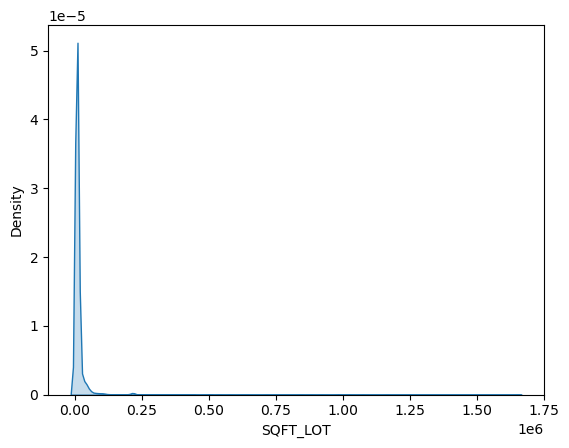

In [78]:
# Drawing a Kernel Density Estimate (KDE) plot for the 'SQFT_LOT' column
# 'fill=True' fills the area under the curve to make the distribution clearer
sns.kdeplot(x=df['SQFT_LOT'], fill=True)

<Axes: xlabel='SQFT_LOT'>

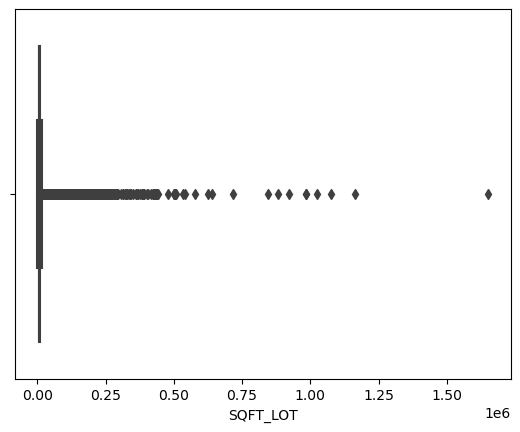

In [79]:
# Drawing a boxplot for the 'SQFT_LOT' column to visualize its distribution and detect outliers
sns.boxplot(x=df['SQFT_LOT'])

In [80]:
# Displaying the 97th percentile value (outlier threshold) for the 'SQFT_LOT' column
outlier['SQFT_LOT']

67436.83999999994

In [81]:
# Filtering the DataFrame to include only rows where 'SQFT_LOT' is less than or equal to 67436.84
# This removes rows with 'SQFT_LOT' values greater than this threshold (outliers)
df = df[df['SQFT_LOT'] <= 67436.84]

<Axes: xlabel='SQFT_LOT'>

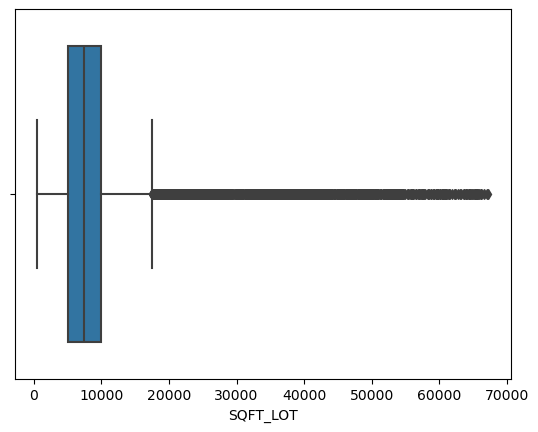

In [82]:
sns.boxplot(x=df['SQFT_LOT'])

<Axes: xlabel='SQFT_LOT', ylabel='Density'>

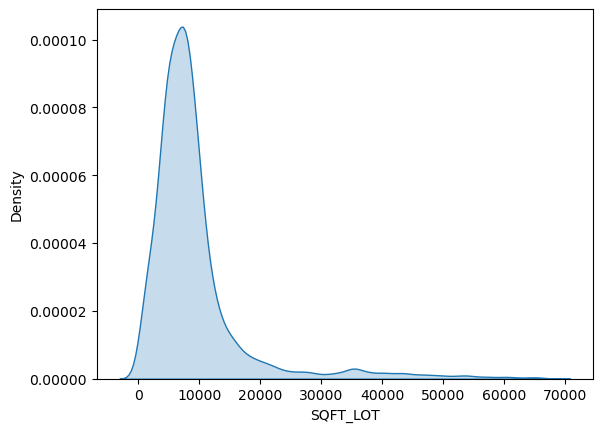

In [83]:
sns.kdeplot(x=df['SQFT_LOT'],fill=True)

### FLOORS

In [84]:
# Displaying all unique values in the 'FLOORS' column
df['FLOORS'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [85]:
# Showing the number of unique values in the 'FLOORS' column
df['FLOORS'].nunique()

6

<Axes: xlabel='FLOORS', ylabel='Density'>

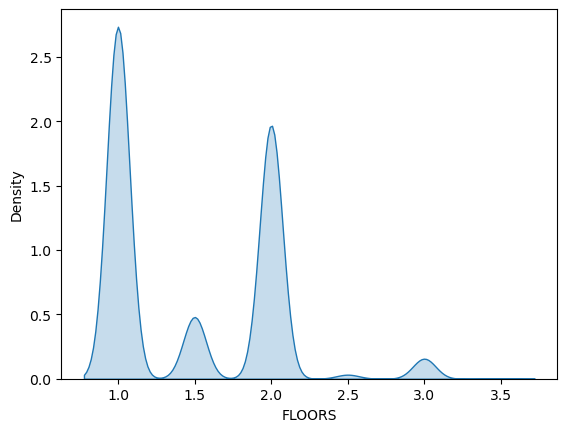

In [86]:
sns.kdeplot(x=df['FLOORS'], fill=True)

<Axes: xlabel='FLOORS'>

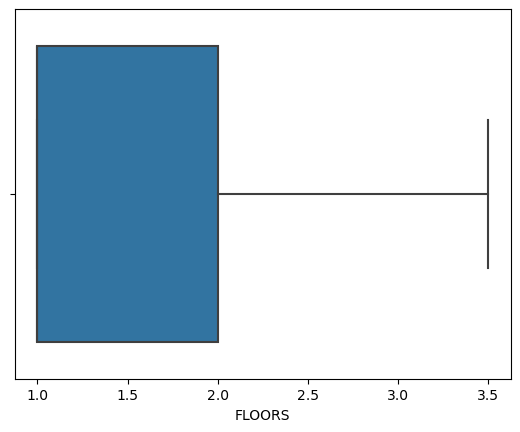

In [87]:
sns.boxplot(x=df['FLOORS'])

In [88]:
# This code is used to access the outlier thresholds for the "FLOORS" column.
# It retrieves the outlier values (such as the upper and lower boundaries) 
# that were previously calculated and stored in the "outlier" dictionary or data structure.
outlier['FLOORS']

2.5

In [89]:
df = df[df['FLOORS'] >= 2.5]

<Axes: xlabel='FLOORS', ylabel='Density'>

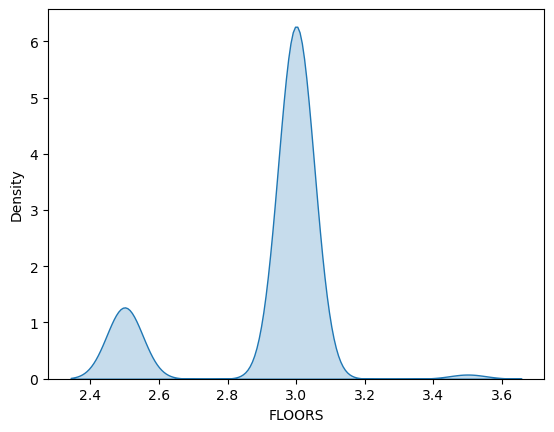

In [90]:
sns.kdeplot(x=df['FLOORS'], fill=True)

<Axes: xlabel='FLOORS'>

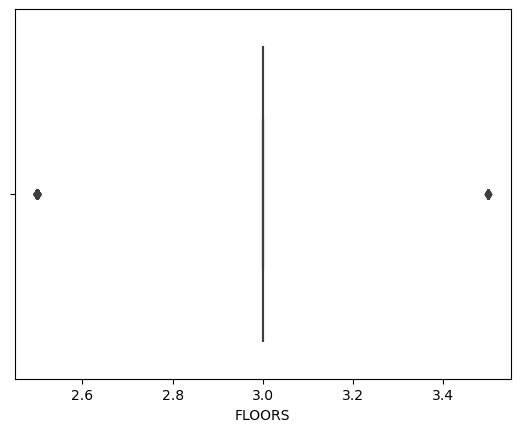

In [91]:
sns.boxplot(x=df['FLOORS'])

In [94]:
df.info()  # Displays a summary of the DataFrame: column types, non-null counts, and memory usage.

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 31 to 21546
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Unnamed: 0     714 non-null    int64   
 1   ID             714 non-null    int64   
 2   DATE           714 non-null    object  
 3   PRICE          714 non-null    float64 
 4   BEDROOMS       714 non-null    int64   
 5   BATHROOMS      714 non-null    float64 
 6   SQFT_LIVING    714 non-null    int64   
 7   SQFT_LOT       714 non-null    int64   
 8   FLOORS         714 non-null    float64 
 9   WATERFRONT     714 non-null    int64   
 10  VIEW           714 non-null    int64   
 11  CONDITION      714 non-null    int64   
 12  GRADE          714 non-null    int64   
 13  SQFT_ABOVE     714 non-null    int64   
 14  SQFT_BASEMENT  714 non-null    int64   
 15  YR_BUILT       714 non-null    int64   
 16  YR_RENOVATED   714 non-null    int64   
 17  ZIPCODE        714 non-null    catego

In [93]:
df['ZIPCODE'] = df['ZIPCODE'].astype('category') # Converted the 'ZIPCODE' column to a category type because it does not have numerical significance.

In [95]:
df.info()  # Displays a summary of the DataFrame: column types, non-null counts, and memory usage.

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 31 to 21546
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Unnamed: 0     714 non-null    int64   
 1   ID             714 non-null    int64   
 2   DATE           714 non-null    object  
 3   PRICE          714 non-null    float64 
 4   BEDROOMS       714 non-null    int64   
 5   BATHROOMS      714 non-null    float64 
 6   SQFT_LIVING    714 non-null    int64   
 7   SQFT_LOT       714 non-null    int64   
 8   FLOORS         714 non-null    float64 
 9   WATERFRONT     714 non-null    int64   
 10  VIEW           714 non-null    int64   
 11  CONDITION      714 non-null    int64   
 12  GRADE          714 non-null    int64   
 13  SQFT_ABOVE     714 non-null    int64   
 14  SQFT_BASEMENT  714 non-null    int64   
 15  YR_BUILT       714 non-null    int64   
 16  YR_RENOVATED   714 non-null    int64   
 17  ZIPCODE        714 non-null    catego

- We have reviewed the columns up to this point, checking data quality, normalization, and outliers. Data analysis was performed, resulting in a CSV file. This is essentially the outcome of the EDA (Exploratory Data Analysis) process.

In [96]:
df.to_csv('feature_engineering_before_eda.csv')  
# Saves the current DataFrame to a CSV file named 'feature_engineering_before_eda.csv'.
# This is done to preserve the data state before moving to feature engineering.

## Feature Engineering

In [97]:
import datetime  # Imports the datetime module to work with dates and times.
import numpy as np  # Imports NumPy, a library for numerical operations and handling arrays in Python.

In [98]:
df.head()  # Shows the first 5 rows of the DataFrame.

,Unnamed: 0,ID,DATE,PRICE,BEDROOMS,BATHROOMS,SQFT_LIVING,SQFT_LOT,FLOORS,WATERFRONT,VIEW,CONDITION,GRADE,SQFT_ABOVE,SQFT_BASEMENT,YR_BUILT,YR_RENOVATED,ZIPCODE,LAT,LONG,SQFT_LIVING15,SQFT_LOT15,YEAR,MONTH,DAY,MONTH_NAME,DAY_NAME
31,31,2426039314,2014-12-01,280000.0,2,1.50,1190,1265,3.0,0,0,3,7,1190,0,2005,0,98133,47.7274,-122.357,1390,1756,2014,12,1,December,Monday
63,63,9528102996,2014-12-07,549000.0,3,1.75,1540,1044,3.0,0,0,3,8,1540,0,2014,0,98115,47.6765,-122.320,1580,3090,2014,12,7,December,Sunday
116,116,3362400431,2014-06-26,518500.0,3,3.50,1590,1102,3.0,0,0,3,8,1590,0,2010,0,98103,47.6824,-122.347,1620,3166,2014,6,26,June,Thursday
134,134,2767602356,2015-01-26,675000.0,4,3.50,2140,2278,3.0,0,0,3,9,2140,0,2005,0,98107,47.6734,-122.380,1540,2285,2015,1,26,January,Monday
139,139,2767603505,2014-05-07,519950.0,3,2.25,1170,1249,3.0,0,0,3,8,1170,0,2014,0,98107,47.6722,-122.381,1350,1310,2014,5,7,May,Wednesday


In [99]:
df['AGE'] = datetime.datetime.now().year - df['YR_BUILT']  
# Calculates the age of each property by subtracting the 'YR_BUILT' (year built) from the current year.
# Stores the result in a new column 'AGE'.

In [100]:
'''
df['NEW_RENOVATED'] = 2024 - df['YR_RENOVATED']  
# Calculates the years since the last renovation (assuming the current year is 2024).

df.loc[df['NEW_RENOVATED'] == 2024, 'NEW_RENOVATED'] = 0  
# Sets 'NEW_RENOVATED' to 0 if the property has never been renovated (i.e., 'YR_RENOVATED' is 0).
'''


"\ndf['NEW_RENOVATED'] = 2024 - df['YR_RENOVATED']  \n# Calculates the years since the last renovation (assuming the current year is 2024).\n\ndf.loc[df['NEW_RENOVATED'] == 2024, 'NEW_RENOVATED'] = 0  \n# Sets 'NEW_RENOVATED' to 0 if the property has never been renovated (i.e., 'YR_RENOVATED' is 0).\n"

In [101]:
df.head(2)  # Shows the first 2 rows of the DataFrame.

,Unnamed: 0,ID,DATE,PRICE,BEDROOMS,BATHROOMS,SQFT_LIVING,SQFT_LOT,FLOORS,WATERFRONT,VIEW,CONDITION,GRADE,SQFT_ABOVE,SQFT_BASEMENT,YR_BUILT,YR_RENOVATED,ZIPCODE,LAT,LONG,SQFT_LIVING15,SQFT_LOT15,YEAR,MONTH,DAY,MONTH_NAME,DAY_NAME,AGE
31,31,2426039314,2014-12-01,280000.0,2,1.50,1190,1265,3.0,0,0,3,7,1190,0,2005,0,98133,47.7274,-122.357,1390,1756,2014,12,1,December,Monday,19
63,63,9528102996,2014-12-07,549000.0,3,1.75,1540,1044,3.0,0,0,3,8,1540,0,2014,0,98115,47.6765,-122.320,1580,3090,2014,12,7,December,Sunday,10


In [102]:
df['RENOVATED'] = np.where(df['YR_RENOVATED'] > 0, 1, 0)  
# Updates the 'RENOVATED' column to 1 if 'YR_RENOVATED' is greater than 0, 
# otherwise sets it to 0. This indicates whether a property has been renovated.

In [103]:
df['BASEMENT'] = np.where(df['SQFT_BASEMENT'] > 0, 1, 0)  
# Updates the 'BASEMENT' column to 1 if 'SQFT_BASEMENT' is greater than 0, 
# otherwise sets it to 0. This indicates whether a property has a basement.

In [104]:
df.head(2)  # Shows the first 2 rows of the DataFrame.

,Unnamed: 0,ID,DATE,PRICE,BEDROOMS,BATHROOMS,SQFT_LIVING,SQFT_LOT,FLOORS,WATERFRONT,VIEW,CONDITION,GRADE,SQFT_ABOVE,SQFT_BASEMENT,YR_BUILT,YR_RENOVATED,ZIPCODE,LAT,LONG,SQFT_LIVING15,SQFT_LOT15,YEAR,MONTH,DAY,MONTH_NAME,DAY_NAME,AGE,RENOVATED,BASEMENT
31,31,2426039314,2014-12-01,280000.0,2,1.50,1190,1265,3.0,0,0,3,7,1190,0,2005,0,98133,47.7274,-122.357,1390,1756,2014,12,1,December,Monday,19,0,0
63,63,9528102996,2014-12-07,549000.0,3,1.75,1540,1044,3.0,0,0,3,8,1540,0,2014,0,98115,47.6765,-122.320,1580,3090,2014,12,7,December,Sunday,10,0,0


## Modelling

### Choose a Target & Show Correlation With Others

In [105]:
abs(df.corr(numeric_only=True)['PRICE']).sort_values(ascending=True)  
# Calculates the absolute correlations of all columns with 'PRICE', 
# then sorts them in ascending order. 
# Correlations between 20% and 90% are considered to avoid underfitting and overfitting.

ID               0.016190
YEAR             0.018196
DAY              0.031059
MONTH            0.040045
LONG             0.144841
Unnamed: 0       0.146442
RENOVATED        0.150504
YR_RENOVATED     0.150666
LAT              0.185414
BASEMENT         0.232317
FLOORS           0.287419
SQFT_LOT         0.292008
WATERFRONT       0.304438
BATHROOMS        0.322015
SQFT_BASEMENT    0.356780
CONDITION        0.368922
AGE              0.373136
YR_BUILT         0.373136
SQFT_LOT15       0.389964
VIEW             0.390625
BEDROOMS         0.412967
GRADE            0.669846
SQFT_LIVING15    0.696515
SQFT_ABOVE       0.706856
SQFT_LIVING      0.738613
PRICE            1.000000
Name: PRICE, dtype: float64

In [106]:
x = df[['WATERFRONT', 'FLOORS', 'BEDROOMS', 'VIEW', 'BATHROOMS', 'SQFT_ABOVE', 
        'SQFT_LIVING15', 'SQFT_LIVING', 'GRADE', 'ZIPCODE', 'DAY_NAME', 'YEAR']]  
# Selects features (independent variables) for the model from the DataFrame.

y = df['PRICE']  
# Defines the target variable (dependent variable) to predict, which is 'PRICE'.

In [107]:
x = pd.get_dummies(x, drop_first=True)  
# Converts categorical variables in 'x' to dummy/indicator variables, 
# and drops the first category to avoid multicollinearity.

In [108]:
x  # Displays the DataFrame 'x' after converting categorical variables to dummy variables.

,WATERFRONT,FLOORS,BEDROOMS,VIEW,BATHROOMS,SQFT_ABOVE,SQFT_LIVING15,SQFT_LIVING,GRADE,YEAR,ZIPCODE_98004,ZIPCODE_98005,ZIPCODE_98007,ZIPCODE_98010,ZIPCODE_98022,ZIPCODE_98023,ZIPCODE_98027,ZIPCODE_98028,ZIPCODE_98029,ZIPCODE_98030,ZIPCODE_98034,ZIPCODE_98040,ZIPCODE_98042,ZIPCODE_98052,ZIPCODE_98053,ZIPCODE_98056,ZIPCODE_98059,ZIPCODE_98074,ZIPCODE_98075,ZIPCODE_98102,ZIPCODE_98103,ZIPCODE_98105,ZIPCODE_98106,ZIPCODE_98107,ZIPCODE_98108,ZIPCODE_98109,ZIPCODE_98112,ZIPCODE_98115,ZIPCODE_98116,ZIPCODE_98117,ZIPCODE_98118,ZIPCODE_98119,ZIPCODE_98122,ZIPCODE_98125,ZIPCODE_98126,ZIPCODE_98133,ZIPCODE_98136,ZIPCODE_98144,ZIPCODE_98155,ZIPCODE_98166,ZIPCODE_98177,ZIPCODE_98178,ZIPCODE_98199,DAY_NAME_Monday,DAY_NAME_Saturday,DAY_NAME_Sunday,DAY_NAME_Thursday,DAY_NAME_Tuesday,DAY_NAME_Wednesday
31,0,3.0,2,0,1.50,1190,1390,1190,7,2014,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
63,0,3.0,3,0,1.75,1540,1580,1540,8,2014,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
116,0,3.0,3,0,3.50,1590,1620,1590,8,2014,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
134,0,3.0,4,0,3.50,2140,1540,2140,9,2015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
139,0,3.0,3,0,2.25,1170,1350,1170,8,2014,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21530,0,3.0,3,0,2.25,1190,1180,1190,8,2015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
21533,0,3.0,2,0,2.25,1480,1530,1530,8,2014,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21539,0,3.0,3,0,2.50,1425,1285,1425,8,2015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
21542,0,3.0,3,0,2.00,1490,1400,1490,8,2015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,

In [109]:
from sklearn.model_selection import train_test_split  
# Imports the function to split the dataset into training and testing sets.

from sklearn.linear_model import Ridge, Lasso, ElasticNet  
# Imports regression models: Ridge, Lasso, and ElasticNet for performing regularized linear regression.

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.20, random_state=42)  
# Splits the dataset into training and testing sets.
# train_size=0.20 specifies that 20% of the data will be used for testing, and the rest for training.
# random_state=42 ensures that the split is reproducible. Using the same random_state will give the same split each time you run the code.

In [112]:
## Different machine learning models: 

R = Ridge()  
# Initializes a Ridge regression model, which applies L2 regularization to prevent overfitting.

L = Lasso()  
# Initializes a Lasso regression model, which applies L1 regularization for feature selection and sparsity.

E = ElasticNet()  
# Initializes an ElasticNet regression model, which combines L1 and L2 regularization.

In [113]:
modelR = R.fit(x_train, y_train)  
# Fits the Ridge regression model to the training data.
# The model learns from the training features 'x_train' and target values 'y_train'.

In [114]:
modelL = L.fit(x_train, y_train)  
# Fits the Lasso regression model to the training data.
# The model learns from the training features 'x_train' and target values 'y_train'.

In [115]:
modelE = E.fit(x_train, y_train)  
# Fits the ElasticNet regression model to the training data.
# The model learns from the training features 'x_train' and target values 'y_train'.

In [116]:
predictR = modelR.predict(x_test)  
# Uses the Ridge regression model to make predictions on the test data.
# The model generates predicted values based on the test features 'x_test'.

In [117]:
predictL = modelL.predict(x_test)  
# Uses the Lasso regression model to make predictions on the test data.
# The model generates predicted values based on the test features 'x_test'.

In [118]:
predictE = modelE.predict(x_test)  
# Uses the ElasticNet regression model to make predictions on the test data.
# The model generates predicted values based on the test features 'x_test'.

In [119]:
predictR  
# Displays the predictions made by the Ridge regression model on the test data.

array([ 358520.4207686 ,  446537.54882996,  423780.37384881,
        343024.58328602,  909846.98507991,  296803.45746831,
       1420761.66950727,  320432.43127308,  495825.44215435,
        395419.49796037,  812199.46487344,  533072.21148401,
        365692.89045499,  639680.83276751,  488520.52887914,
        365791.47947091,  550178.1381425 ,  280287.54025477,
        498959.05526043,  552215.69225532,  591867.22391621,
        992586.4864907 ,  469746.38708232,  613705.22213278,
        428182.97977339,  501845.0025938 ,  505740.58098529,
        782208.5828938 ,  434257.37711998,  489457.76243642,
        676499.1493362 ,  731575.66619463,  422044.23733474,
        491070.14330657, 1160179.54621757,  768567.01905966,
        396253.5871206 ,  428860.10315861,  459152.23172157,
        946753.56043351,  322200.27394918,  476109.95666281,
        696856.40799273,  344731.89437718,  395704.36801104,
        269063.61905243,  957744.24075564,  439807.71118949,
        525676.73811971,

In [120]:
predictL  
# Displays the predictions made by the Lasso regression model on the test data.

array([ 327825.37090871,  451804.2563532 ,  387161.43167263,
        390752.69734287,  901115.36917877,  161128.26627412,
       1356030.12427902,  201557.81015153,   12978.03821827,
        422794.90862687,  959136.61707777,  536290.04318459,
        354980.71038982,  632059.51993132,  595060.44907057,
        397723.5629814 ,  630194.41169327,  288396.30986062,
        530996.99366188,  629128.03940646,  527830.82735185,
        947641.09933457,  441578.07091399,  595724.95065542,
        441972.2746857 ,  587268.37793891,  534073.09905307,
        799952.09916601,  391238.36829796,  527981.71827966,
        705726.61231501,  767920.35793775,  481812.28741036,
        498720.78067726, 1263309.70758574,  920712.21915035,
        440890.87455933,  418107.17337975,  440916.31155446,
        890143.11574502,  289513.92616051,  455412.91063295,
        728447.04321781,  387529.33730546,  -35052.16457516,
        288566.37653615, 1063981.57616045,  405450.85044549,
        531756.16120194,

In [121]:
predictE  
# Displays the predictions made by the ElasticNet regression model on the test data.

array([ 333511.05643429,  330149.71269733,  535758.42673337,
        438861.26363375,  614754.37257213,  394137.28408093,
       1086656.65541112,  395234.18711186,  514245.51690567,
        469953.07573757,  714064.13637466,  556607.99299877,
        366098.69376353,  624688.99712934,  566479.40418165,
        399246.53931856,  496501.91718004,  388319.36700179,
        514737.88008309,  518592.63266997,  589625.52882427,
       1009430.78529536,  436749.47159239,  505935.12182655,
        445870.14847798,  453550.56180854,  435436.09927352,
        534012.97341327,  429499.48076176,  447391.6757587 ,
        618025.75433282,  697469.20557218,  393825.35239993,
        511440.3430168 , 1242675.35302851,  600033.07712724,
        370892.67642382,  395099.72119375,  470751.06743239,
       1036347.15360292,  401476.79828134,  442560.13172146,
        573850.34742943,  398587.89658257,  439086.43951305,
        328216.61265018,  902801.3360443 ,  430945.24291044,
        465793.3750711 ,

In [122]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  
# Imports evaluation metrics for regression models:
# r2_score: Measures the proportion of variance in the target variable explained by the model.
# mean_squared_error: Calculates the average squared difference between actual and predicted values.
# mean_absolute_error: Calculates the average absolute difference between actual and predicted values.

In [123]:
r2_score(predictR, y_test)  
# Calculates the R-squared score for the Ridge regression model's predictions.
# Measures how well the predicted values match the actual values in the test set.

0.5692359729797019

In [124]:
mean_absolute_error(predictR, y_test)  
# Calculates the mean absolute error for the Ridge regression model's predictions.
# Measures the average absolute difference between the predicted values and the actual values in the test set.

104346.85388128109

In [125]:
mean_squared_error(predictR, y_test)  
# Calculates the mean squared error for the Ridge regression model's predictions.
# Measures the average of the squares of the differences between the predicted values and the actual values in the test set.

24127451029.38159

In [126]:
r2_score(predictL, y_test)  
# Calculates the R-squared score for the Lasso regression model's predictions.
# Measures how well the predicted values match the actual values in the test set.

0.7049831792471424

In [129]:
mean_squared_error(predictL, y_test)  
# Calculates the mean squared error for the Lasso regression model's predictions.
# Measures the average of the squares of the differences between the predicted values and the actual values in the test set.

24000461106.357742

In [130]:
mean_absolute_error(predictL, y_test)  
# Calculates the mean absolute error for the Lasso regression model's predictions.
# Measures the average absolute difference between the predicted values and the actual values in the test set.

107264.67776105167

In [131]:
r2_score(predictE, y_test)  
# Calculates the R-squared score for the ElasticNet regression model's predictions.
# Measures how well the predicted values match the actual values in the test set.

0.3876797923122841

In [132]:
mean_squared_error(predictE, y_test)  
# Calculates the mean squared error for the ElasticNet regression model's predictions.
# Measures the average of the squares of the differences between the predicted values and the actual values in the test set.

29911700732.106003

In [133]:
mean_absolute_error(predictE, y_test)  
# Calculates the mean absolute error for the ElasticNet regression model's predictions.
# Measures the average absolute difference between the predicted values and the actual values in the test set.

119055.27499126946

### Dont repeat yourself

In [134]:
from sklearn.model_selection import train_test_split  
# Imports the function to split data into training and testing sets.

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression  
# Imports various linear regression models: Ridge, Lasso, ElasticNet, and standard LinearRegression.

from sklearn.neighbors import KNeighborsRegressor  
# Imports the K-Nearest Neighbors regression model, which predicts values based on the closest training examples.

from sklearn.ensemble import GradientBoostingRegressor  
# Imports the Gradient Boosting Regressor, which builds an ensemble of weak learners to improve predictive performance.

from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor  
# Imports decision tree models: ExtraTreeRegressor (a variant with randomized splits) and DecisionTreeRegressor (standard decision tree).

from xgboost import XGBRegressor  
# Imports the XGBoost regressor, an optimized gradient boosting method known for its performance and efficiency.

### Here is a brief explanation of each library:
### <K-Nearest Neighbors> - Predicts based on the nearest data points.
### <Gradient Boosting> - Combines multiple models to improve performance.
### <Decision Trees> - Splits data into branches to make predictions.
### <XGBoost> - Advanced gradient boosting technique with high accuracy and speed.

In [135]:
def regression_test(x, y):
    """
    Function to evaluate multiple regression models.

    Parameters:
    x : DataFrame
        Features for training and testing the models.
    y : Series
        Target variable for training and testing the models.

    Returns:
    DataFrame
        A DataFrame containing the R^2, RMSE, and MAE scores of different models, sorted by R^2 score.
    """
    # Initialize models
    L = LinearRegression()
    R = Ridge()
    E = ElasticNet()
    Lass = Lasso()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    KN = KNeighborsRegressor()
    XGB = XGBRegressor()

    # List of models and their names for organization
    modelling = [L, R, E, Lass, ETR, GBR, KN, XGB]
    modelling_name = ['LinearRegression', 'Ridge', 'ElasticNet', 'Lasso',
                      'ExtraTreeRegressor', 'GradientBoostingRegressor',
                      'KNeighborsRegressor', 'XGBRegressor']

    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Initialize lists to store evaluation metrics
    r_squared = []
    rmse = []
    mae = []

    # Create a DataFrame to store results
    result = pd.DataFrame(columns=['R_SQUARED', 'RMSE', 'MAE'], index=modelling_name)

    # Evaluate each model
    for model in modelling:
        prediction = model.fit(x_train, y_train).predict(x_test)
        r_squared.append(r2_score(y_test, prediction))
        rmse.append(mean_squared_error(y_test, prediction)**0.5)
        mae.append(mean_absolute_error(y_test, prediction))

    # Populate the result DataFrame
    result['R_SQUARED'] = r_squared
    result['RMSE'] = rmse
    result['MAE'] = mae

    # Sort models by R^2 score in descending order
    best_model = result.sort_values('R_SQUARED', ascending=False)

    return best_model


#### Explanation:
-Initialization: Sets up different regression models and their names.

-Data Splitting: Splits the dataset into training and testing subsets.

-Model Evaluation: Fits each model on the training data and evaluates its performance on the test data.

-Results Collection: Stores evaluation metrics (R², RMSE, MAE) in a DataFrame.

-Sorting: Sorts models based on R² score in descending order and returns the result.

--This function allows you to compare various regression models and determine which performs best based on the R² score.

In [138]:
# Example usage of the regression_test function

# Assuming x and y are already defined as your features and target variables
best_models = regression_test(x, y)

# Display the results
best_models


,R_SQUARED,RMSE,MAE
Ridge,0.840739,113110.978950,80444.153962
Lasso,0.832453,116016.193356,82629.399812
GradientBoostingRegressor,0.832369,116045.273020,80353.399707
LinearRegression,0.831545,116330.036426,82758.432176
XGBRegressor,0.785147,131377.339263,84950.180507
ElasticNet,0.743801,143462.684946,106881.027162
ExtraTreeRegressor,0.678435,160725.301739,110190.398601
KNeighborsRegressor,0.582158,183212.806942,125916.054545


In [145]:
# Importing the 'visualize' library and aliasing it as 'vs'
# This library might contain functions for data visualization.
from vissuAlize import vissuAlize as vs

In [147]:
help(vs.bar)

Help on function bar in module vissuAlize.main:

bar(x, y, title='Title', xlabel='X-axis', ylabel='Y-axis', figsize=(8, 6), color='maroon', orientation='vertical', **kwargs)
    Draws a bar chart for the given data.
    
    Parameters:
    - x: The values for the x-axis (category names or numbers).
    - y: The values for the y-axis.
    - title: The title of the chart.
    - xlabel: The label for the x-axis.
    - ylabel: The label for the y-axis.
    - figsize: The size of the figure, formatted as (width, height) in inches.
    - color: The color of the bars.
    - orientation: The orientation of the bars, either 'vertical' or 'horizontal'.
    - **kwargs: Additional keyword arguments to be passed to the matplotlib bar function.



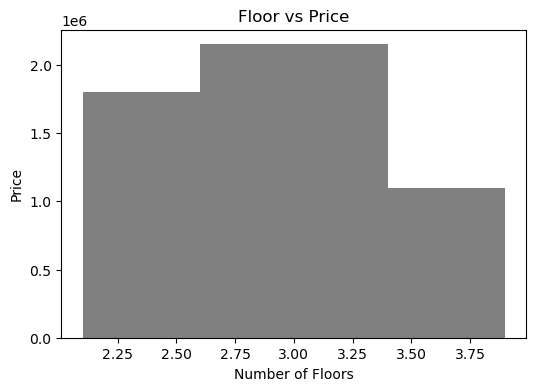

In [154]:
# Creates a bar chart with 'FLOORS' on the x-axis and 'PRICE' on the y-axis.
# The chart is titled 'Floor vs Price', with 'Number of Floors' as the x-axis label and 'Price' as the y-axis label.
# The chart is sized at 6x4 inches and colored gray.
vs.bar(x=df['FLOORS'], y=df['PRICE'], title='Floor vs Price', xlabel='Number of Floors', ylabel='Price', figsize=(6,4), color='gray')

In [155]:
best_models

,R_SQUARED,RMSE,MAE
Ridge,0.840739,113110.978950,80444.153962
Lasso,0.832453,116016.193356,82629.399812
GradientBoostingRegressor,0.832369,116045.273020,80353.399707
LinearRegression,0.831545,116330.036426,82758.432176
XGBRegressor,0.785147,131377.339263,84950.180507
ElasticNet,0.743801,143462.684946,106881.027162
ExtraTreeRegressor,0.678435,160725.301739,110190.398601
KNeighborsRegressor,0.582158,183212.806942,125916.054545


In [156]:
# This line of code calculates the total number of missing (null) values in each column of the DataFrame 'df'.
df.isnull().sum()

Unnamed: 0       0
ID               0
DATE             0
PRICE            0
BEDROOMS         0
BATHROOMS        0
SQFT_LIVING      0
SQFT_LOT         0
FLOORS           0
WATERFRONT       0
VIEW             0
CONDITION        0
GRADE            0
SQFT_ABOVE       0
SQFT_BASEMENT    0
YR_BUILT         0
YR_RENOVATED     0
ZIPCODE          0
LAT              0
LONG             0
SQFT_LIVING15    0
SQFT_LOT15       0
YEAR             0
MONTH            0
DAY              0
MONTH_NAME       0
DAY_NAME         0
AGE              0
RENOVATED        0
BASEMENT         0
dtype: int64

In [157]:
# This line of code saves the DataFrame 'df' to a CSV file named 'full_model_before_evaluation.csv'.
df.to_csv('full_model_before_evaluation.csv', index=False)